# Machine learning on MNIST

## Import libraries

In [55]:
%load_ext autoreload
%autoreload 2

import random
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt

from src.neuralnetwork.activations import Tanh, Sigmoid, Softmax, ReLU, PReLU, Swish
from src.neuralnetwork.losses import MSE
from src.neuralnetwork.layers import Dense
from src.neuralnetwork.model import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [56]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        f.seek(0)
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        return (training_data, validation_data, test_data)

In [57]:
training_data, validation_data, test_data = load_data()

[5 0 4 1 9 2]


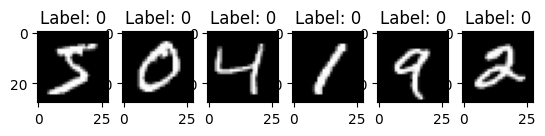

In [58]:
def view_image(images):
    n: int = len(images)
    f = plt.figure()

    for i in range(n):
        f.add_subplot(1, n, i + 1)
        reshape_img = images[i].reshape((28, 28))
        normalize_img = reshape_img/255
        plt.title('Label: {label}'.format(label = np.argmax(training_data[1][i])))
        plt.imshow(normalize_img, cmap="gray")
        #plt.show(block=True)


view_image(training_data[0][:6])

print(training_data[1][:6])


In [59]:
input = training_data[0]

output = np.zeros((training_data[1].shape[0], 10))
for i in range(training_data[1].shape[0]):
    output[i, training_data[1][i]] = 1

input = input.reshape((50000, 784, 1))
output = output.reshape((50000, 10, 1))

## Define model

In [61]:
%reload_ext autoreload

network = [
    Dense(784, 128),
    Tanh(),
    Dense(128, 40),
    Tanh(),
    Dense(40, 10),
    Softmax()
]

model = Model(network, MSE())

## Train model

In [62]:
model.train(input, output, epochs=20, learning_rate=0.1, batch_size=10)

epoch 1/20   batch 5000/5000   error=682.747077
epoch 2/20   batch 5000/5000   error=514.260596
epoch 3/20   batch 5000/5000   error=414.341471
epoch 4/20   batch 5000/5000   error=341.389938
epoch 5/20   batch 5000/5000   error=284.610930
epoch 6/20   batch 5000/5000   error=244.699562
epoch 7/20   batch 5000/5000   error=212.747959
epoch 8/20   batch 5000/5000   error=190.969073
epoch 9/20   batch 5000/5000   error=175.215699
epoch 10/20   batch 5000/5000   error=162.850836
epoch 11/20   batch 5000/5000   error=151.865378
epoch 12/20   batch 5000/5000   error=139.951970
epoch 13/20   batch 5000/5000   error=130.995539
epoch 14/20   batch 5000/5000   error=123.964376
epoch 15/20   batch 5000/5000   error=113.774771
epoch 16/20   batch 5000/5000   error=107.875139
epoch 17/20   batch 5000/5000   error=101.559094
epoch 18/20   batch 5000/5000   error=95.452472
epoch 19/20   batch 5000/5000   error=88.933688
epoch 20/20   batch 5000/5000   error=82.733425


In [63]:
model.test(input, output)

error=0.051042


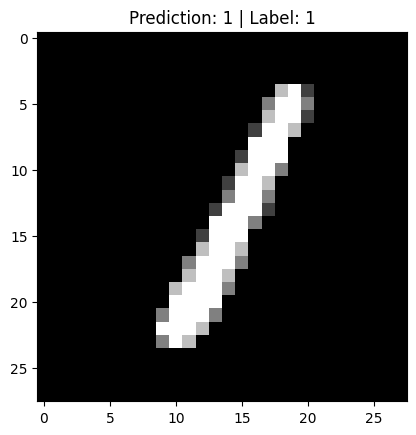

In [64]:
def view_prediction(index, input, output):
    prediction = model.predict(input[index, :])

    k = input[index, :].reshape((28, 28))

    plt.title('Prediction: {pred} | Label: {label}'.format(
        pred=np.argmax(prediction), label=np.argmax(output[index])))
    plt.imshow(k, cmap='gray')


view_prediction(random.randint(0, input.shape[0]), input, output)


In [65]:
input_test = test_data[0].reshape((10000, 784, 1))

output_test = np.zeros((test_data[1].shape[0], 10))
for i in range(test_data[1].shape[0]):
    output_test[i, test_data[1][i]] = 1

output_test = output_test.reshape((10000, 10, 1))

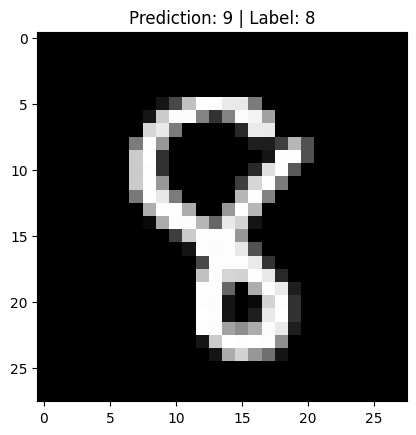

In [66]:
view_prediction(random.randint(0, test_data[0].shape[0]), input_test, output_test)

In [67]:
def global_check(x, y):
    error_list = []

    for i in range(len(x)):
        prediction = model.predict(x[i,:])
        if(np.argmax(prediction) != np.argmax(y[i])):
            error_list.append(i)
    
    return error_list

error_list = global_check(input, output)

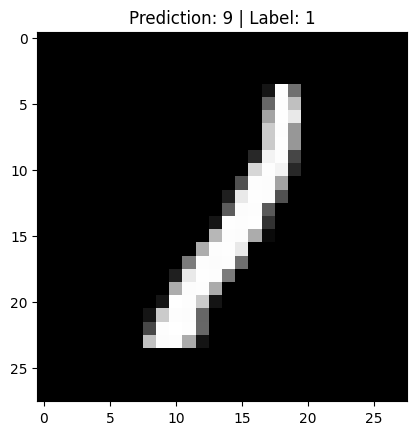

In [68]:
view_prediction(error_list[random.randint(0, len(error_list))], input, output)

In [71]:
len(error_list)

15994

In [70]:
import dill as pickle
from pathlib import Path

Path("output/").mkdir(parents=True, exist_ok=True)

with open('output/model.pkl', 'wb') as f:
    pickle.dump(model, f)